Based on the dataset provided below, you’re required to develop a model to generate a short summary that accurately summarizes the main points and key insights (in negative and positive content). The summary should be concise, yet still, retain the essence of the original text. The summarization model should generate personalized summaries based on a set of user-specific keywords. Then, extend the summarization model to provide additional suggestions or recommendations based on the contents. 


Import the Neccessary Libraries

In [6]:
!pip install streamlit
!pip install ipython==7.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00


In [7]:
import streamlit as st
import numpy as np
import pandas as pd
from tqdm import tqdm
import re

import warnings
warnings.filterwarnings("ignore")
import pickle

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk import ne_chunk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [8]:
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
!pip install -q streamlit

In [11]:
!./ngrok authtokens 2LDN5hELqBDDgDO9GKeMrVCaxOf_7tdMSxkVENkwfN8CM5zAp

/bin/bash: ./ngrok: No such file or directory


In [12]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=58422c1307a49eece6cf73dca793e512433c4b34c9b34f29e6340a17f7f18d6c
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [14]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

INFO:pyngrok.ngrok:Opening tunnel named: http-80-ba5c0453-5d50-4ec7-ae7a-853fa379aceb
2023-02-03 05:20:08.117 Opening tunnel named: http-80-ba5c0453-5d50-4ec7-ae7a-853fa379aceb


INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:08+0000 lvl=info msg="no configuration paths supplied"
2023-02-03 05:20:08.762 t=2023-02-03T05:20:08+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:08+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-02-03 05:20:08.767 t=2023-02-03T05:20:08+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:08+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-02-03 05:20:08.771 t=2023-02-03T05:20:08+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:08+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2023-02-03 05:20:08.773 t=2023-02-03T05:20:08+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:

<NgrokTunnel: "http://3ec2-34-86-80-20.ngrok.io" -> "http://localhost:80">

2023-02-03 05:20:08.920 t=2023-02-03T05:20:08+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-ba5c0453-5d50-4ec7-ae7a-853fa379aceb addr=http://localhost:80 url=https://3ec2-34-86-80-20.ngrok.io
INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:08+0000 lvl=info msg=end pg=/api/tunnels id=a2a576530ef71991 status=201 dur=39.595156ms
2023-02-03 05:20:08.926 t=2023-02-03T05:20:08+0000 lvl=info msg=end pg=/api/tunnels id=a2a576530ef71991 status=201 dur=39.595156ms
INFO:pyngrok.process.ngrok:t=2023-02-03T05:20:08+0000 lvl=info msg=start pg="/api/tunnels/http-80-ba5c0453-5d50-4ec7-ae7a-853fa379aceb (http)" id=ba934a4e18bccb3a
2023-02-03 05:20:08.934 t=2023-02-03T05:20:08+0000 lvl=info msg=start pg="/api/tunnels/http-80-ba5c0453-5d50-4ec7-ae7a-853fa379aceb (http)" id=ba934a4e18bccb3a


In [15]:
%%writefile text_analytics_app.py 
#Title of the project
st.title("Text summarization that will recommend suggestions based on text analytics and sentiment analysis")

Writing text_analytics_app.py


In [18]:
#!streamlit run /content/text_analytics_app.py & npx localtunnel -- port 8501

Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the data
df = pd.read_csv('drive/My Drive/SIFA_DS_Intern/FF_dataset.csv')

In [ ]:
df.head()

,notes,email summary,country
0,"36-year-old engineer, been working there for 5...","Dear [Name], \n\nThank you for providing me wi...",UK
1,I often tell clients that planning for their r...,"Dear [Client], \n\nThank you for your recent c...",UK
2,"Name - Scott Snedden Age 45 Employed £100,000","Dear Scott, \n\nI hope this email finds you we...",UK
3,"Family D.O.B: 47 Married / Single: Kate, 40 D....","Dear Name, \n\nI wanted to summarize the fact-...",UK
4,"Name: Joe Young 50 years old Single, no depend...","Dear [username], \n\nI am writing to summarise...",UK


In [ ]:
df.rename(columns = {'email summary':'email_summary'}, inplace = True)

In [ ]:
df['notes'][3]

'Family D.O.B: 47 Married / Single: Kate, 40 D.O.B of Partner: 2 young kids 2 boys Oliver Rowland 5 Alfie 2 Children: Will? - no Residential Own\u202f/ Rent: y Value: 495k 4 year - 600k now Mortgage: 250k sept 2.19% What type of mortgage: 1670/m Term and rate? How long do you see yourself there? Min 5 years - 10 years Bit more land - price go up 750-800k Other properties? Bought holiday 70k Srvice charge 5k/y Rental Income? Employment Role: director, GT, Manchaster 18 yers tax advice Enjoy it Looking to move up to partner in next year Reasonable Some life insurance, private Fixed profit shares Block of Min 175-200k Earnings: 120k Base: Bonus: disc ( 15k-20) Deferred stock: Are you obliged to hold any level of stock? Partners role: senior ey 8month 15 Private owned 3 days a week 2024 Dirctor 53k Partners remuneration: Pension: Sw - 23% - 9.5% 950 - 2950 £300,000 Stock 25% 18% uk index 15% All defult funds 26% property penison 2010 - too busy EY - 15k - wtw Aviva - 40k What pension pots 

In [ ]:
df['email_summary'][3]

"Dear Name, \n\nI wanted to summarize the fact-find that we just conducted and provide you with my expert insights on your financial situation. Here are the key points: \n\nPositive Areas: \n\nYou are a director at a company in Manchester and have been working there for 18 years. You are looking to move up to a partner role in the near future. \n\nYou have a strong earning potential, with a base salary of £120,000, a bonus of £15,000 to £20,000, and deferred stock. \n\nYou have a reasonable amount of savings, with £80,000 in cash and a £20,000 offset account against your mortgage. \n\nYou have several pension pots, including a workplace pension with a current balance of £18,000, a personal pension with KPMG with a balance of £45,000, and a pension with Legal & General with a balance of £4,000. \n\nYou have a relatively low level of debt, with a mortgage balance of £250,000 and a repayment of £1670 per month. \n\nNegative Areas: \n\nYour mortgage is up for renewal in September and you w

Droping Duplicates and NA values

In [ ]:
df.drop_duplicates(subset=['notes'],inplace=True)  #dropping duplicates
df.drop_duplicates(subset=['email_summary'],inplace=True)   #dropping duplicates
df.dropna(axis=0,inplace=True)  #dropping nan 

Basic information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   notes          25 non-null     object
 1   email_summary  25 non-null     object
 2   country        25 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-02-01 03:11:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-02-01 03:11:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-01 03:11:36--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Word embeddings for glove vector

In [ ]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:
len(word_embeddings)

400000

Pre-processing Text data (Email_Summary)

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
text = df['email_summary'][6]

In [ ]:
def preprocessed_text(text):
  
  text = text.lower()
  text=re.sub('[\w\.-]+@[\w\.-]+\.\w+', ' ',text)
  text= re.sub("[\(\[].*?[\)\]]", "", text)
  text=re.sub("Subject:.*\w+",'',text)

  #3. Delete all the sentances where sentence starts with "Write to:" or "From:".
  text=re.sub("From:.*?", ' ',text)
  text=re.sub("Write to:.*?",' ',text)

  # 4. Delete all the tags like "< anyword >"
  clean = re.compile('<.*?>')
  text=re.sub(clean,' ',text)

  # 5. Delete all the data which are present in the brackets. 
  clean1 = re.compile('\(.*\)')
  text=re.sub(clean1,'',text)

  #6. Remove all the newlines('\n'), tabs('\t'), "-", "\".
  text= re.sub(r"[\n\t-]*", "", text)

  #Remove all the words which ends with ":".
  text= re.sub(r'\w+:\s?',' ',text)

  text= re.sub('[^A-Za-z0-9]+', ' ',text)

  text = ' '.join(e.lower() for e in text.split(' '))
  text = ' '.join(e for e in text.split(' ')  if len(e)>2 and len(e)<15)

  #Decontraction of text
  text = decontracted(text)

  return text

In [ ]:
preprocessed_text(text)

'factfind summary for alistair forbes and jackie forbes dear forbes and jackie writing provide summary our recent factfind meeting where discussed your financial situation goals and expectations based the information you provided would like highlight some the positive aspects your financial situation and also identify some areas for improvement positive you have investment portfolio with ubs which includes your own funds and joint portfolio oeic feeding into isas you have keen interest tax planning and have exposure private equity eis both terms your working history and investments made mitigate tax you have clear goal winding down from paid work and using your assets secure income for the future areas for currently not have full understanding your assets and debts which will necessary order provide you with comprehensive financial advice there has been discussion yet about your current income and expenses which will also necessary order make informed decisions will important consider 

In [ ]:
preprocessed_email_summary=[]

for i in tqdm(range(df.shape[0])):
  preprocessed_email_summary.append(preprocessed_text(df['email_summary'].values[i]))


100%|██████████| 25/25 [00:00<00:00, 749.71it/s]


In [ ]:
preprocessed_email_summary[6]

'factfind summary for alistair forbes and jackie forbes dear forbes and jackie writing provide summary our recent factfind meeting where discussed your financial situation goals and expectations based the information you provided would like highlight some the positive aspects your financial situation and also identify some areas for improvement positive you have investment portfolio with ubs which includes your own funds and joint portfolio oeic feeding into isas you have keen interest tax planning and have exposure private equity eis both terms your working history and investments made mitigate tax you have clear goal winding down from paid work and using your assets secure income for the future areas for currently not have full understanding your assets and debts which will necessary order provide you with comprehensive financial advice there has been discussion yet about your current income and expenses which will also necessary order make informed decisions will important consider 

Preprocessing text for notes

In [ ]:
def preprocessed_notes_text(text):
  
  text = text.lower()
  text=re.sub('[\w\.-]+@[\w\.-]+\.\w+', ' ',text)
  text= re.sub("[\(\[].*?[\)\]]", "", text)
  text=re.sub("Subject:.*\w+",'',text)

  #3. Delete all the sentances where sentence starts with "Write to:" or "From:".
  text=re.sub("From:.*?", ' ',text)
  text=re.sub("Write to:.*?",' ',text)

  # 4. Delete all the tags like "< anyword >"
  clean = re.compile('<.*?>')
  text=re.sub(clean,' ',text)

  # 5. Delete all the data which are present in the brackets. 
  clean1 = re.compile('\(.*\)')
  text=re.sub(clean1,'',text)

  #6. Remove all the newlines('\n'), tabs('\t'), "-", "\".
  text= re.sub(r"[\n\t-]*", "", text)

  #Remove all the words which ends with ":".
  text= re.sub(r'\w+:\s?',' ',text)

  #text= re.sub('[^A-Za-z0-9]+', ' ',text)

  #text = ' '.join(e.lower() for e in text.split(' '))
  #text = ' '.join(e for e in text.split(' ')  if len(e)>2 and len(e)<15)

  #Decontraction of text
  text = decontracted(text)

  return text

In [ ]:
preprocessed_notes = []

for i in tqdm(range(df.shape[0])):
  preprocessed_notes.append(preprocessed_notes_text(df['notes'].values[i]))

100%|██████████| 25/25 [00:00<00:00, 1841.51it/s]


In [ ]:
preprocessed_notes[6]

'dr alistair forbes and wife jackie. referred by doug wilson who worked with alistair at houndog home is heriot row also property in strathtay, aberfeldy investment portfolio with ubs. seems to be in 2 of their own funds. joint portfolio/oeic feeding isas. want to review their strategy winding down from paid work  how best to use their assets income for the future. no discussion as yet about current inc v expenses. iht? no numbers on assets as yet. no mention of debt. private equity/eis exposure both in terms of working history and investments made to mitigate tax. asked about; • how i provide advice • sjp role • performance • charges need to send/think about; • performance/analytics • scdd • voyant info • 3 questions • sjp ima info • need to think about tax if they restructure  cgt? techlink tax questionnaire? '

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(sen):
  sen_new = " ".join([i for i in sen if i not in stop_words])
  return sen_new

In [ ]:
# remove stopwords from the sentences
clean_sentences_email = [remove_stopwords(r.split()) for r in preprocessed_email_summary]
clean_sentences_notes = [remove_stopwords(r.split()) for r in preprocessed_notes]

In [ ]:
clean_sentences_notes[6]

'dr alistair forbes wife jackie. referred doug wilson worked alistair houndog home heriot row also property strathtay, aberfeldy investment portfolio ubs. seems 2 funds. joint portfolio/oeic feeding isas. want review strategy winding paid work best use assets income future. discussion yet current inc v expenses. iht? numbers assets yet. mention debt. private equity/eis exposure terms working history investments made mitigate tax. asked about; • provide advice • sjp role • performance • charges need send/think about; • performance/analytics • scdd • voyant info • 3 questions • sjp ima info • need think tax restructure cgt? techlink tax questionnaire?'

In [ ]:
clean_sentences_email[6]

'factfind summary alistair forbes jackie forbes dear forbes jackie writing provide summary recent factfind meeting discussed financial situation goals expectations based information provided would like highlight positive aspects financial situation also identify areas improvement positive investment portfolio ubs includes funds joint portfolio oeic feeding isas keen interest tax planning exposure private equity eis terms working history investments made mitigate tax clear goal winding paid work using assets secure income future areas currently full understanding assets debts necessary order provide comprehensive financial advice discussion yet current income expenses also necessary order make informed decisions important consider potential impact tax decide restructure portfolio including capital gains tax relevant taxes moving forward would like provide following understanding financial situation would like provide performance analytics including information voyant sjp ima would also 

In [ ]:
df['preprocessed_email_summary'] = clean_sentences_email
df['preprocessed_notes'] = clean_sentences_notes

In [ ]:
df.head(1)

,notes,email_summary,country,preprocessed_email_summary,preprocessed_notes
0,"36-year-old engineer, been working there for 5...","Dear [Name], \n\nThank you for providing me wi...",UK,dear thank providing details financial situati...,"36yearold engineer, working 5 years, move back..."


**Text** **Analytics**

Sentence Tokenization

In [ ]:
from nltk.tokenize import sent_tokenize
tokenized_email_text= []
tokenized_email_word = []
tokenized_notes_text = []
tokenized_notes_word = []

fdist_email = []
fdist_notes = []

for i in tqdm(range(df.shape[0])):

  #Sentence Tokenization
  tokenized_email_text.append(sent_tokenize(df['preprocessed_email_summary'].values[i]))

  #Word Tokenization
  tokenized_email_word.append(word_tokenize(df['preprocessed_email_summary'].values[i]))


  #Sentence Tokenization
  tokenized_notes_text.append(sent_tokenize(df['preprocessed_notes'].values[i]))

  #Word Tokenization
  tokenized_notes_word.append(word_tokenize(df['preprocessed_notes'].values[i]))




100%|██████████| 25/25 [00:00<00:00, 397.59it/s]


In [ ]:
#Frequency distribution table
for each_word in tokenized_email_word:
  fdist_email = FreqDist(each_word)

for each_word in tokenized_notes_word:
  fdist_notes = FreqDist(each_word)

In [ ]:
fdist_email


FreqDist({'investment': 5, 'lifestyle': 5, 'financial': 4, 'income': 4, 'help': 4, 'may': 4, 'consider': 4, 'review': 3, 'provide': 3, 'passive': 3, ...})

In [ ]:
fdist_notes

FreqDist({'2': 2, 'home': 2, 'rental': 2, 'properties': 2, 'sarah': 1, 'johnson': 1, '60': 1, 'retired': 1, '$': 1, '50,000': 1, ...})

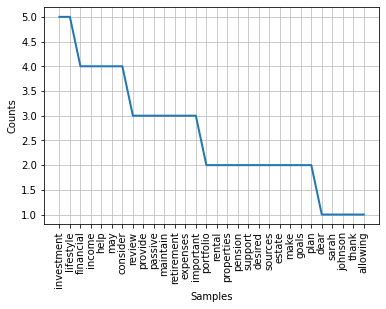

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

fdist_email.plot(30,cumulative=False)
plt.show()

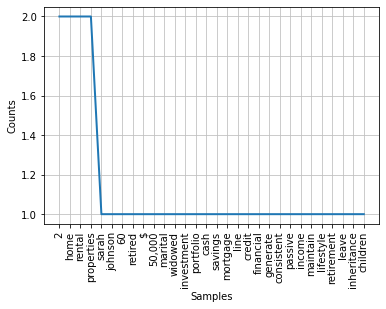

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

fdist_notes.plot(30,cumulative=False)
plt.show()

Removing Stopwords from email_text and notes_text


In [ ]:
filtered_tokens_email=[]
for w in tokenized_email_word:    
    if w not in stop_words:
         filtered_tokens_email.append(w)

print("Tokenized Words:",tokenized_email_word)
print("Filterd Tokens:",filtered_tokens_email)

Tokenized Words: [['dear', 'thank', 'providing', 'details', 'financial', 'situation', 'appreciate', 'opportunity', 'offer', 'expert', 'insights', 'based', 'information', 'shared', 'would', 'like', 'summarize', 'key', 'points', 'financial', 'positive', '36yearold', 'engineer', 'working', 'years', 'nonqualified', 'pension', 'efa', 'organization', 'balance', '120k', 'agreement', 'french', 'tax', 'authorities', 'tax', 'income', 'salary', 'capital', 'gains', 'expected', 'make', 'significant', 'gain', 'french', 'property', 'taxfree', 'negative', 'moving', 'back', 'family', 'reasons', 'longer', 'french', 'resident', 'taxed', 'provisionally', 'april', '6th', '2023', 'physically', 'move', 'back', 'around', 'february', '15th', 'pension', 'investment', 'fund', 'rather', 'traditional', 'pension', 'given', 'situation', 'would', 'like', 'offer', 'following', 'since', 'moving', 'back', 'longer', 'french', 'resident', 'important', 'consider', 'impact', 'change', 'financial', 'situation', 'particular',

In [ ]:
filtered_tokens_notes=[]
for w in tokenized_notes_word:    
    if w not in stop_words:
         filtered_tokens_notes.append(w)

print("Tokenized Words:",tokenized_notes_word)
print("Filterd Tokens:",filtered_tokens_notes)

Tokenized Words: [['36yearold', 'engineer', ',', 'working', '5', 'years', ',', 'move', 'back', 'uk', 'family', 'reasons', '.', 'property', 'sell', '.', 'nonqualified', 'pension', 'efa', 'organisation', ',', '€120k', ',', 'already', 'agreement', 'french', 'tax', 'authorities', 'won', '’', 't', 'tax', 'income', 'salary', 'tax', 'capital', 'gains', '.', 'still', 'french', 'resident', ',', 'uk', '6th', 'april', '2023', 'tax', 'provisionally', 'physically', 'moving', 'back', 'around', '15th', 'february', '.', 'significant', 'gain', 'french', 'property', 'taxfree', '.', 'close', 'pension', 'payroll', 'end', 'feb', 'could', 'end', 'march', '.'], ['often', 'tell', 'clients', 'planning', 'retirement', 'like', 'putting', 'together', 'puzzle', '.', 'explain', 'image', 'box', ',', 'envision', 'living', 'lives', ',', 'spend', 'time', ',', 'spend', 'with', ',', 'intentions', 'beyond', '?', 'job', 'take', 'puzzle', 'pieces', 'align', 'way', 'focus', 'living', 'picture', ',', '“', 'life', 'well', 'pla

In [ ]:
import string

# removing punctuations
punctuations=list(string.punctuation)

filtered_tokens_notes2=[]
filtered_tokens_email2=[]

for i in filtered_tokens_notes:
    if i not in punctuations:
        filtered_tokens_notes2.append(i)

for i in filtered_tokens_email:
    if i not in punctuations:
        filtered_tokens_email2.append(i)
        
print("Filterd Tokens After Removing Punctuations:",filtered_tokens_notes2)
print("Filterd Tokens After Removing Punctuations:",filtered_tokens_email2)

Filterd Tokens After Removing Punctuations: [['36yearold', 'engineer', ',', 'working', '5', 'years', ',', 'move', 'back', 'uk', 'family', 'reasons', '.', 'property', 'sell', '.', 'nonqualified', 'pension', 'efa', 'organisation', ',', '€120k', ',', 'already', 'agreement', 'french', 'tax', 'authorities', 'won', '’', 't', 'tax', 'income', 'salary', 'tax', 'capital', 'gains', '.', 'still', 'french', 'resident', ',', 'uk', '6th', 'april', '2023', 'tax', 'provisionally', 'physically', 'moving', 'back', 'around', '15th', 'february', '.', 'significant', 'gain', 'french', 'property', 'taxfree', '.', 'close', 'pension', 'payroll', 'end', 'feb', 'could', 'end', 'march', '.'], ['often', 'tell', 'clients', 'planning', 'retirement', 'like', 'putting', 'together', 'puzzle', '.', 'explain', 'image', 'box', ',', 'envision', 'living', 'lives', ',', 'spend', 'time', ',', 'spend', 'with', ',', 'intentions', 'beyond', '?', 'job', 'take', 'puzzle', 'pieces', 'align', 'way', 'focus', 'living', 'picture', ','

Weighted word frequency

In [ ]:
maximum_frequncy = max(fdist_email.values())

for word in fdist_email.keys():
    fdist_email[word] = (fdist_email[word]/maximum_frequncy)

In [ ]:
maximum_frequncy

5

In [ ]:
df['email_summary'][4]

"Dear [username], \n\nI am writing to summarise the financial fact-find that we recently conducted. Please find below the highlights of the positive and negative areas of the fact-find. \n\nPositive areas: \n\nJoe Young is 50 years old and is single with no dependants. \n\nHe owns a property worth £700,000, with a mortgage of £150,000. \n\nJoe has 3 personal pensions, with a total value of around £500,000. \n\nHe also has a final salary pension, which will provide him with an income of £5,000 per annum from age 65. \n\nJoe does not have any debts besides his mortgage. \n\nNegative areas: \n\nAt this time, there is no specific financial goal or objective mentioned. \n\nThe value of Joe's personal pensions is not broken down into the individual funds, so it is not possible to provide a full analysis of the investments. \n\nBased on the information provided, it appears that Joe has a strong financial foundation with significant assets in property and pensions. However, without a clear fin

In [ ]:
sent_score_list = []

for each_sent in df['email_summary']:
  sentence_scores = {}
  for sentence in nltk.sent_tokenize(each_sent):
    for word in nltk.word_tokenize(sentence):
        if word in fdist_email and len(sentence.split(' ')) < 30:
            if sentence not in sentence_scores:
              sentence_scores[sentence] = fdist_email[word]
            else:
              sentence_scores[sentence] += fdist_email[word]

  sent_score_list.append(sentence_scores)

In [ ]:
len(sent_score_list)

25

In [ ]:
sent_score_list[4]

{'Dear [username], \n\nI am writing to summarise the financial fact-find that we recently conducted.': 0.8,
 'Please find below the highlights of the positive and negative areas of the fact-find.': 0.4,
 'He owns a property worth £700,000, with a mortgage of £150,000.': 0.4,
 'Joe has 3 personal pensions, with a total value of around £500,000.': 0.2,
 'He also has a final salary pension, which will provide him with an income of £5,000 per annum from age 65.': 2.0,
 'Joe does not have any debts besides his mortgage.': 0.2,
 'Negative areas: \n\nAt this time, there is no specific financial goal or objective mentioned.': 0.8,
 "The value of Joe's personal pensions is not broken down into the individual funds, so it is not possible to provide a full analysis of the investments.": 1.0,
 'Based on the information provided, it appears that Joe has a strong financial foundation with significant assets in property and pensions.': 1.2,
 'However, without a clear financial goal or objective, it i

In [ ]:
import heapq

sentence_summary = []
for sent_score in sent_score_list:
  summary_sentences = heapq.nlargest(4, sent_score, key=sent_score.get)
  summary = ' '.join(summary_sentences)
  sentence_summary.append(summary)

print(len(sentence_summary))

25


In [ ]:
!pip install rouge-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=4df2c7e73008ea9fe08c8b7f63d450e5086e1024e6d4a3442fc7a9daada5e9b9
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
scores = []
for i in tqdm(range(df.shape[0])):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores.append(scorer.score(df['email_summary'].values[i],sentence_summary[i]))


100%|██████████| 25/25 [00:00<00:00, 33.97it/s]


In [ ]:
scores

[{'rouge1': Score(precision=1.0, recall=0.24202127659574468, fmeasure=0.3897216274089935),
  'rougeL': Score(precision=0.5494505494505495, recall=0.13297872340425532, fmeasure=0.21413276231263384)},
 {'rouge1': Score(precision=1.0, recall=0.3037249283667622, fmeasure=0.46593406593406594),
  'rougeL': Score(precision=1.0, recall=0.3037249283667622, fmeasure=0.46593406593406594)},
 {'rouge1': Score(precision=1.0, recall=0.29874213836477986, fmeasure=0.46004842615012104),
  'rougeL': Score(precision=0.6736842105263158, recall=0.20125786163522014, fmeasure=0.3099273607748184)},
 {'rouge1': Score(precision=1.0, recall=0.2138364779874214, fmeasure=0.3523316062176166),
  'rougeL': Score(precision=0.5588235294117647, recall=0.11949685534591195, fmeasure=0.19689119170984457)},
 {'rouge1': Score(precision=1.0, recall=0.29739776951672864, fmeasure=0.4584527220630372),
  'rougeL': Score(precision=0.6875, recall=0.20446096654275092, fmeasure=0.3151862464183381)},
 {'rouge1': Score(precision=1.0, re

In [ ]:
df['ets_nltk_email_summary'] = sentence_summary

df.head(2)

,notes,email_summary,country,preprocessed_email_summary,preprocessed_notes,ets_nltk_email_summary
0,"36-year-old engineer, been working there for 5...","Dear [Name], \n\nThank you for providing me wi...",UK,dear thank providing details financial situati...,"36yearold engineer, working 5 years, move back...",An advisor can help you identify opportunities...
1,I often tell clients that planning for their r...,"Dear [Client], \n\nThank you for your recent c...",UK,dear thank recent conversation retirement plan...,often tell clients planning retirement like pu...,"Identifying goals/priorities: In this step, we..."


Gensim implementation of TextRank extractive summarization algorithm




In [ ]:
import gensim
from gensim.summarization import summarize

def text_rank(text):
  # Summarization when both ratio & word count is given
  summary=summarize(text, ratio = 0.2)
  return summary

txtrank_email_summary=[]

for i in tqdm(range(df.shape[0])):
  txtrank_email_summary.append(text_rank(df['email_summary'].values[i]))
  


100%|██████████| 25/25 [00:00<00:00, 32.33it/s]


In [ ]:
df['txtrank_email_summary'] = txtrank_email_summary

In [ ]:
df.head(2)

,notes,email_summary,country,preprocessed_email_summary,preprocessed_notes,ets_nltk_email_summary,txtrank_email_summary
0,"36-year-old engineer, been working there for 5...","Dear [Name], \n\nThank you for providing me wi...",UK,dear thank providing details financial situati...,"36yearold engineer, working 5 years, move back...",An advisor can help you identify opportunities...,"Given your situation, I would like to offer th..."
1,I often tell clients that planning for their r...,"Dear [Client], \n\nThank you for your recent c...",UK,dear thank recent conversation retirement plan...,often tell clients planning retirement like pu...,"Identifying goals/priorities: In this step, we...",Understanding the client: This step involves g...


In [ ]:
from rouge_score import rouge_scorer
scores = []
for i in tqdm(range(df.shape[0])):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores.append(scorer.score(df['email_summary'].values[i], df['txtrank_email_summary'].values[i]))


100%|██████████| 25/25 [00:01<00:00, 17.68it/s]


In [ ]:
scores

[{'rouge1': Score(precision=1.0, recall=0.3191489361702128, fmeasure=0.48387096774193555),
  'rougeL': Score(precision=1.0, recall=0.3191489361702128, fmeasure=0.48387096774193555)},
 {'rouge1': Score(precision=1.0, recall=0.2722063037249284, fmeasure=0.4279279279279279),
  'rougeL': Score(precision=1.0, recall=0.2722063037249284, fmeasure=0.4279279279279279)},
 {'rouge1': Score(precision=1.0, recall=0.24213836477987422, fmeasure=0.38987341772151896),
  'rougeL': Score(precision=1.0, recall=0.24213836477987422, fmeasure=0.38987341772151896)},
 {'rouge1': Score(precision=1.0, recall=0.28721174004192873, fmeasure=0.4462540716612378),
  'rougeL': Score(precision=1.0, recall=0.28721174004192873, fmeasure=0.4462540716612378)},
 {'rouge1': Score(precision=1.0, recall=0.30111524163568776, fmeasure=0.4628571428571429),
  'rougeL': Score(precision=1.0, recall=0.30111524163568776, fmeasure=0.4628571428571429)},
 {'rouge1': Score(precision=1.0, recall=0.2054380664652568, fmeasure=0.34085213032581

Understanding the distribution of the sequences
Here, we will analyze the length of the reviews and the summary to get an overall idea about the distribution of length of the text. This will help us fix the maximum length of the sequence:

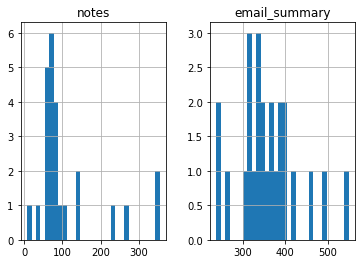

In [ ]:
import matplotlib.pyplot as plt
notes_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['notes']:
      notes_word_count.append(len(i.split()))

for i in df['email_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'notes':notes_word_count, 'email_summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

**Sentiment** **Analysis**

In [ ]:
df['total_len'] = df['preprocessed_notes'].map(lambda x: len(x))

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
df['polarity'] = df['preprocessed_notes'].map(lambda x: sentiment.polarity_scores(x))

In [ ]:
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df.head(1)

,notes,email_summary,country,preprocessed_email_summary,preprocessed_notes,ets_nltk_email_summary,txtrank_email_summary,total_len,neg,neu,pos,compound
0,"36-year-old engineer, been working there for 5...","Dear [Name], \n\nThank you for providing me wi...",UK,dear thank providing details financial situati...,"36yearold engineer, working 5 years, move back...",An advisor can help you identify opportunities...,"Given your situation, I would like to offer th...",405,0.0,0.828,0.172,0.8689


In [ ]:
df[["total_len"]].describe()

,total_len
count,25.000000
mean,438.960000
std,379.077881
min,43.000000
25%,230.000000
50%,268.000000
75%,405.000000
max,1438.000000


**Based on sentiment score make classification**

In [ ]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(1)

,notes,email_summary,country,preprocessed_email_summary,preprocessed_notes,ets_nltk_email_summary,txtrank_email_summary,total_len,neg,neu,pos,compound,sentiment
0,"36-year-old engineer, been working there for 5...","Dear [Name], \n\nThank you for providing me wi...",UK,dear thank providing details financial situati...,"36yearold engineer, working 5 years, move back...",An advisor can help you identify opportunities...,"Given your situation, I would like to offer th...",405,0.0,0.828,0.172,0.8689,positive


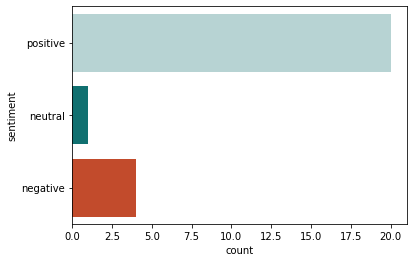

In [ ]:
import seaborn as sns
sns.countplot(y='sentiment', data=df, palette=['#b2d8d8',"#008080", '#db3d13']);

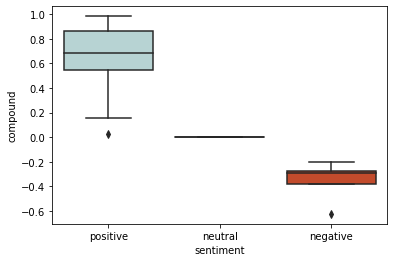

In [ ]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

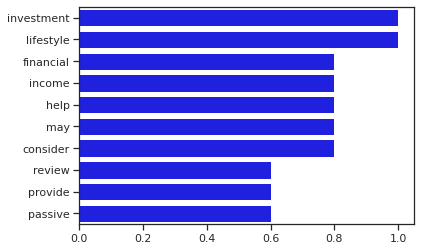

In [ ]:
# Obtain top 10 words
top_10 = fdist_email.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');   

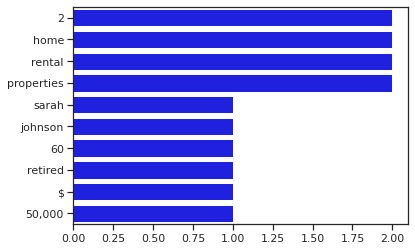

In [ ]:
# Obtain top 10 words
top_10 = fdist_notes.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');  

**Text** **analytics**


sentiment
negative     4
neutral      1
positive    20
dtype: int64


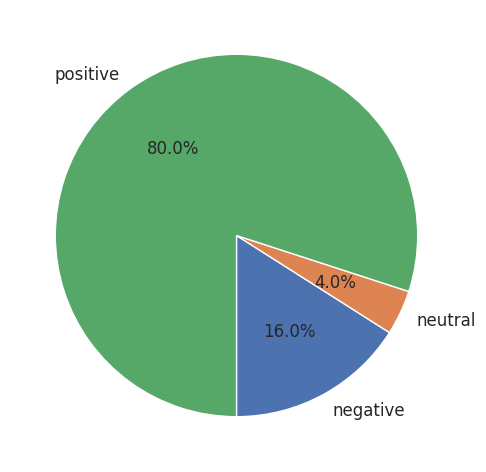

In [ ]:
# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Named Entity Recognition for both notes and email summary


In [ ]:
from nltk import ne_chunk

for i in tqdm(range(df.shape[0])):
  for chunk in ne_chunk(nltk.pos_tag(word_tokenize(df['notes'].values[i]))):
        if hasattr(chunk, 'label'):
            print(chunk.label(), ' '.join(c[0] for c in chunk))

  4%|▍         | 1/25 [00:00<00:03,  7.55it/s]

ORGANIZATION UK
ORGANIZATION EFA
GPE French
GPE French
ORGANIZATION UK
GPE French
PERSON Analyze
PERSON Monitor
PERSON Analyze
ORGANIZATION Create
ORGANIZATION Investment
GPE Name
PERSON Scott Snedden


 24%|██▍       | 6/25 [00:00<00:01, 11.05it/s]

GPE Partner
PERSON Oliver Rowland
PERSON Will
PERSON Value
ORGANIZATION Rental Income
ORGANIZATION GT
ORGANIZATION Min
ORGANIZATION Partners
ORGANIZATION Partners
ORGANIZATION EY
PERSON Aviva
GPE Stand
PERSON Dafult
PERSON Cash
ORGANIZATION No Too
GPE Virgin
GPE Cash
PERSON Income
GPE Expenditure
GPE Direct
ORGANIZATION Credit
PERSON Bonus Xmas How
PERSON Cic
GPE Dis
PERSON Choice
GPE Name
PERSON Joe Young
GPE Single
GPE Note
PERSON Helen
PERSON Sharon Gordon
GPE Urquharts
PERSON Manor Care Home
PERSON Queensferry Road
PERSON Edinburgh
ORGANIZATION EH4
PERSON Tel
PERSON Irene McGowan
PERSON Collins Place
PERSON Edin
ORGANIZATION EH3
ORGANIZATION HM324002B Helen
PERSON Cost
ORGANIZATION House
ORGANIZATION Belmont Gardens
PERSON Edinburgh
PERSON Income
PERSON Helen
ORGANIZATION IHT
ORGANIZATION NRB
ORGANIZATION RNRB
PERSON Subject
ORGANIZATION NRB
PERSON Helen
ORGANIZATION RNRB
ORGANIZATION IHT


 32%|███▏      | 8/25 [00:00<00:01, 10.61it/s]

PERSON Jackie
PERSON Doug Wilson
PERSON Alistair
ORGANIZATION Houndog Home
PERSON Heriot Row
GPE Strathtay
PERSON Aberfeldy Investment
ORGANIZATION UBS
PERSON Joint
ORGANIZATION ISAs
PERSON Income
ORGANIZATION SJP
ORGANIZATION CGT
GPE Kids
PERSON Mega
PERSON Line
ORGANIZATION Estate
ORGANIZATION ADP
GPE Maryland
ORGANIZATION SBA
GPE Maryland
ORGANIZATION FBAR
GPE Name
PERSON Kyle Smith Age
ORGANIZATION Marital
GPE Children
PERSON Ethan
PERSON Addy
ORGANIZATION Assets
ORGANIZATION IRA
GPE Brokerage
PERSON Account
GPE Checking
PERSON Business
GPE Liabilities
PERSON Auto Loan
ORGANIZATION Credit Cards
GPE Goals
GPE Maximize
GPE Maximize
PERSON Retire
PERSON Travel


 56%|█████▌    | 14/25 [00:01<00:00, 16.38it/s]

PERSON Client
ORGANIZATION Marital
PERSON Herta Wright
PERSON Retired Current Income
PERSON Social Security Benefit
PERSON Renter
PERSON Monthly Rent
PERSON Employer
GPE Paychex
PERSON Account Owner
PERSON Brother
PERSON Account Owner
GPE Name
PERSON Neill Gregson Age
PERSON Planner Income
ORGANIZATION Marital
PERSON Married Children
GPE Liabilities
PERSON Goals
GPE Name
PERSON Sarah Johnson Age
PERSON Manager Income
PERSON Marital Status
ORGANIZATION Liabilities
PERSON Goals
GPE Name
PERSON Sarah Johnson Age
PERSON Graphic Designer Income
ORGANIZATION Marital
PERSON Single Children
GPE Name
PERSON Jane Doe Age
PERSON Manager Income
ORGANIZATION Marital
PERSON Single Children
ORGANIZATION Liabilities
PERSON Goals
GPE Name
PERSON Elizabeth Adams Age
PERSON Marital Status
GPE Children
ORGANIZATION Liabilities
PERSON Goals


 80%|████████  | 20/25 [00:01<00:00, 21.13it/s]

GPE Name
PERSON Karen Wilson Age
PERSON Retired Teacher Income
PERSON Marital Status
GPE Children
ORGANIZATION Credit
GPE Maintain
GPE Name
PERSON Michael Smith Age
ORGANIZATION Marital
PERSON Married Children
GPE Name
PERSON Maria Gonzalez Age
PERSON School Teacher Income
ORGANIZATION Marital
PERSON Married Children
ORGANIZATION Liabilities
PERSON Goals
GPE Name
PERSON Sarah Johnson Age
PERSON Manager Income
ORGANIZATION Marital
GPE Children
GPE Name
PERSON Karen Lee Age
ORGANIZATION Marital
PERSON Married Children
PERSON College
PERSON Retire
GPE Maintain
PERSON Travel
GPE Name
PERSON Karen Chen Age
PERSON Retired Marital Status
PERSON Married Children
ORGANIZATION IRA


100%|██████████| 25/25 [00:01<00:00, 17.03it/s]

GPE Name
PERSON Sarah Johnson Age
PERSON Retired Teacher Income
PERSON Marital Status
GPE Children
GPE Maintain
GPE Name
PERSON Susan Kim Age
PERSON Retired Teacher Income
ORGANIZATION Marital
GPE Children
ORGANIZATION IRA
GPE Name
PERSON Maria Smith Age
PERSON Income
PERSON Marital Status
GPE Children
GPE Name
PERSON Sarah Johnson Age
ORGANIZATION Marital
GPE Children
GPE Maintain


In [ ]:
for i in tqdm(range(df.shape[0])):
  for chunk in ne_chunk(nltk.pos_tag(word_tokenize(df['email_summary'].values[i]))):
        if hasattr(chunk, 'label'):
          print(chunk.label(), ' '.join(c[0] for c in chunk))

  8%|▊         | 2/25 [00:00<00:02,  7.77it/s]

PERSON Dear
GPE Thank
ORGANIZATION EFA
GPE French
GPE French
ORGANIZATION UK
GPE French
ORGANIZATION UK
ORGANIZATION UK
ORGANIZATION UK
GPE French
GPE France
ORGANIZATION UK
ORGANIZATION UK
PERSON Dear
PERSON Client
GPE Thank


 16%|█▌        | 4/25 [00:00<00:02,  7.43it/s]

PERSON Dear
GPE Scott
PERSON Invest
PERSON Dear
GPE Name
ORGANIZATION KPMG
PERSON Legal
ORGANIZATION Virgin Cash
PERSON Shares ISA


 24%|██▍       | 6/25 [00:00<00:02,  7.78it/s]

PERSON Dear
PERSON Joe Young
PERSON Joe
PERSON Joe
PERSON Joe
PERSON Joe
PERSON Joe
GPE Subject
PERSON Helen Sims Dear Sharon Gordon
GPE Urquharts
PERSON Helen Sims
PERSON Irene McGowan
ORGANIZATION UK
PERSON Helen Sims
PERSON Helen Sims
PERSON Helen Sims
PERSON Helen Sims
PERSON Helen Sims
GPE Inheritance
ORGANIZATION IHT
ORGANIZATION Nil Rate Band
ORGANIZATION NRB
ORGANIZATION Residential Nil Rate Band
ORGANIZATION RNRB
PERSON Helen Sims
ORGANIZATION IHT
PERSON Mr. Sims
ORGANIZATION NRB
PERSON Helen
ORGANIZATION RNRB
PERSON Helen Sims


 32%|███▏      | 8/25 [00:01<00:02,  7.06it/s]

GPE Subject
PERSON Jackie Forbes Dear
PERSON Jackie
ORGANIZATION UBS
ORGANIZATION ISAs
PERSON Areas
ORGANIZATION CGT
GPE Voyant
ORGANIZATION SJP
ORGANIZATION SCDD
ORGANIZATION UK
ORGANIZATION UK
PERSON Dear
GPE Maryland
GPE Columbia
ORGANIZATION HOA
GPE Citi
PERSON Roth IRA
ORGANIZATION HELOC
ORGANIZATION SBA
GPE Maryland
ORGANIZATION FBAR
GPE India


 40%|████      | 10/25 [00:01<00:02,  7.36it/s]

PERSON Dear
GPE Kyle
ORGANIZATION IRA
ORGANIZATION IRA
GPE Subject
PERSON Client
PERSON Paychex
PERSON Obtain Medical
ORGANIZATION Medicare
PERSON Increase Retirement
PERSON Paychex
ORGANIZATION IRA


 48%|████▊     | 12/25 [00:01<00:01,  7.41it/s]

PERSON Dear
PERSON Neill Gregson
GPE Thank
GPE Strong
PERSON Hello
GPE Sarah
GPE Thank
ORGANIZATION IRA


 56%|█████▌    | 14/25 [00:01<00:01,  7.22it/s]

GPE Subject
PERSON Sarah Johnson Financial
PERSON Sarah
PERSON Increase
PERSON Roth IRA
PERSON Save
GPE Subject
PERSON Jane Doe Dear Jane
PERSON Below
ORGANIZATION IRA


 64%|██████▍   | 16/25 [00:02<00:01,  7.26it/s]

PERSON Dear
PERSON Elizabeth Adams
PERSON Dear
GPE Karen


 72%|███████▏  | 18/25 [00:02<00:00,  8.57it/s]

GPE Subject
PERSON Michael
PERSON Negative Areas
PERSON Dear
GPE Maria
ORGANIZATION IRA
GPE Financial


 80%|████████  | 20/25 [00:02<00:00,  7.09it/s]

GPE Subject
ORGANIZATION Financial
PERSON Sarah Johnson Dear Sarah
GPE Thank
PERSON Below
GPE Subject
PERSON Karen Lee Financial
GPE Thank
ORGANIZATION Social
PERSON Travel


 88%|████████▊ | 22/25 [00:03<00:00,  6.83it/s]

PERSON Dear
GPE Karen
ORGANIZATION IRA
ORGANIZATION Investment Portfolio
ORGANIZATION IRA
ORGANIZATION IRA
ORGANIZATION IRA
PERSON Legacy Planning
GPE Subject
PERSON Sarah Johnson
PERSON Sarah


 96%|█████████▌| 24/25 [00:03<00:00,  6.30it/s]

PERSON Dear
GPE Susan
GPE Thank
ORGANIZATION IRA
PERSON Negative Areas
PERSON Legacy
GPE Subject
PERSON Maria Smith Dear Maria
PERSON Maria
PERSON Maria
PERSON Review Maria
PERSON Evaluate Maria
PERSON Maria
PERSON Maria
ORGANIZATION IRA
PERSON Maria


100%|██████████| 25/25 [00:03<00:00,  7.21it/s]

PERSON Dear
PERSON Sarah Johnson
GPE Thank
ORGANIZATION REITs
PERSON Plan


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

In [ ]:

example = "My name is yugesh and I live in India"

In [ ]:
NER = pipeline("ner", model=model, tokenizer=tokenizer)
results = NER(df['notes'][2])
results 

[{'entity': 'B-PER',
  'score': 0.99932194,
  'index': 3,
  'word': 'Scott',
  'start': 7,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.9991386,
  'index': 4,
  'word': 'S',
  'start': 13,
  'end': 14},
 {'entity': 'I-PER',
  'score': 0.9973761,
  'index': 5,
  'word': '##ned',
  'start': 14,
  'end': 17},
 {'entity': 'I-PER',
  'score': 0.79959637,
  'index': 6,
  'word': '##den',
  'start': 17,
  'end': 20}]

Key Word Extraction

In [ ]:
!pip3 install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(df['notes'][10])
print(keywords)

[('portfolio', 0.4048), ('isas', 0.3933), ('assets', 0.344), ('expenses', 0.3277), ('investments', 0.3168)]


**Recommendation engine based on Named Entity Recognition**